# Train Test spit is 8:2 and cross validation folds is 5

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Prediction of O using EC : RFC
Best parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.9992159937279498
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1631
           1       1.00      1.00      1.00      1738
           2       1.00      1.00      1.00      1733

    accuracy                           1.00      5102
   macro avg       1.00      1.00      1.00      5102
weighted avg       1.00      1.00      1.00      5102



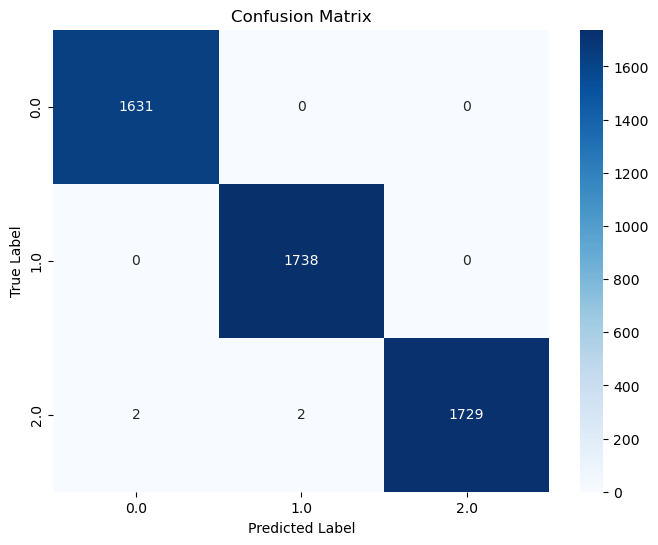

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Pradhyumna R Shetty\Downloads\all_combined.csv"
data = pd.read_csv(file_path)

# Remove rows with missing values in EC and O columns
data_cleaned = data.dropna(subset=['EC', 'O'])

# Use LabelEncoder to transform the target (O) if it's categorical
label_encoder = LabelEncoder()
O_encoded = label_encoder.fit_transform(data_cleaned['O'])

# Prepare the features (X) and target (y)
X = data_cleaned[['EC']]

# Apply standard scaling to the 'EC' feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, O_encoded, test_size=0.2, random_state=42)

# Create a RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
best_rf_model = grid_search.best_estimator_
print("Prediction of O using EC : RFC")
print(f"Best parameters: {grid_search.best_params_}")

# Make predictions on the testing set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Prediction of O using EC : KNN
Best parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Accuracy: 0.9992159937279498
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1631
           1       1.00      1.00      1.00      1738
           2       1.00      1.00      1.00      1733

    accuracy                           1.00      5102
   macro avg       1.00      1.00      1.00      5102
weighted avg       1.00      1.00      1.00      5102



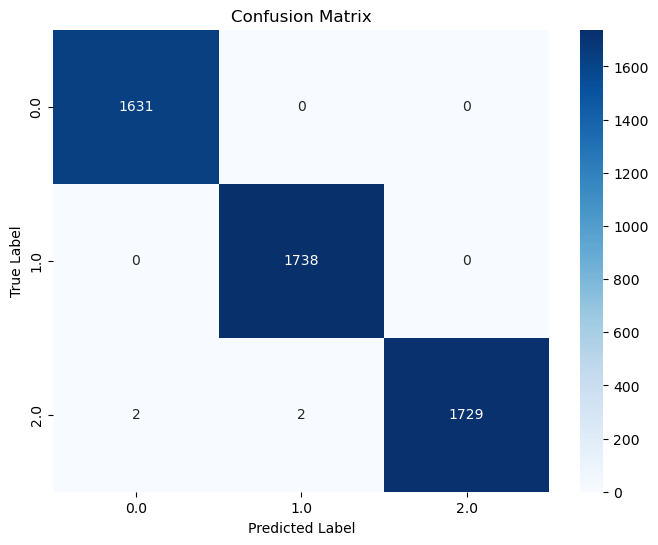

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Pradhyumna R Shetty\Downloads\all_combined.csv"
data = pd.read_csv(file_path)

# Remove rows with missing values in EC and O columns
data_cleaned = data.dropna(subset=['EC', 'O'])

# Use LabelEncoder to transform the target (O) if it's categorical
label_encoder = LabelEncoder()
O_encoded = label_encoder.fit_transform(data_cleaned['O'])

# Prepare the features (X) and target (y)
X = data_cleaned[['EC']]

# Apply standard scaling to the 'EC' feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, O_encoded, test_size=0.2, random_state=42)

# Create a KNeighborsClassifier model
knn_model = KNeighborsClassifier()

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for the Minkowski metric (1 for Manhattan, 2 for Euclidean)
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
best_knn_model = grid_search.best_estimator_
print("Prediction of O using EC : KNN")
print(f"Best parameters: {grid_search.best_params_}")

# Make predictions on the testing set
y_pred = best_knn_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Prediction of O using EC : Naive Bayes
Accuracy: 0.7173657389259114
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.13      0.23      1631
           1       0.69      0.99      0.81      1738
           2       0.72      1.00      0.84      1733

    accuracy                           0.72      5102
   macro avg       0.77      0.71      0.63      5102
weighted avg       0.77      0.72      0.64      5102



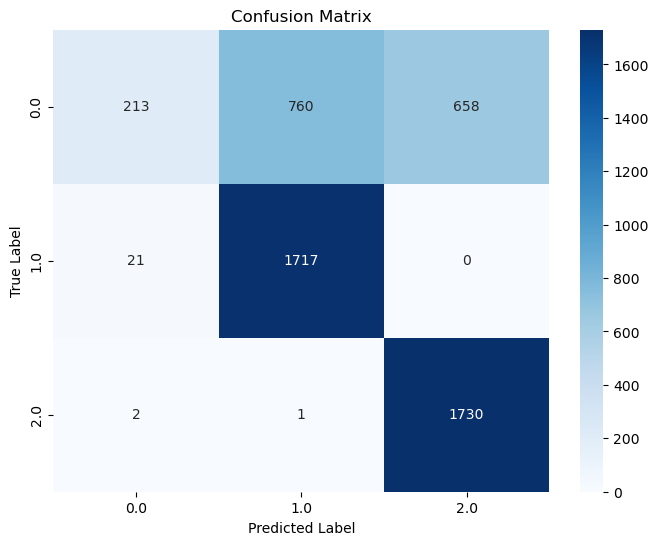

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Pradhyumna R Shetty\Downloads\all_combined.csv"
data = pd.read_csv(file_path)

# Remove rows with missing values in EC and O columns
data_cleaned = data.dropna(subset=['EC', 'O'])

# Use LabelEncoder to transform the target (O) if it's categorical
label_encoder = LabelEncoder()
O_encoded = label_encoder.fit_transform(data_cleaned['O'])

# Prepare the features (X) and target (y)
X = data_cleaned[['EC']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, O_encoded, test_size=0.2, random_state=42)

# Create a GaussianNB model (Naive Bayes)
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = nb_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Prediction of O using EC : Naive Bayes")
print(f"Accuracy: {accuracy}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Changing Train Test split to 7:3 and cross validation folds to 9

Fitting 9 folds for each of 216 candidates, totalling 1944 fits
Prediction of O using EC : RFC
Best parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.9993466614399582
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2436
           1       1.00      1.00      1.00      2645
           2       1.00      1.00      1.00      2572

    accuracy                           1.00      7653
   macro avg       1.00      1.00      1.00      7653
weighted avg       1.00      1.00      1.00      7653



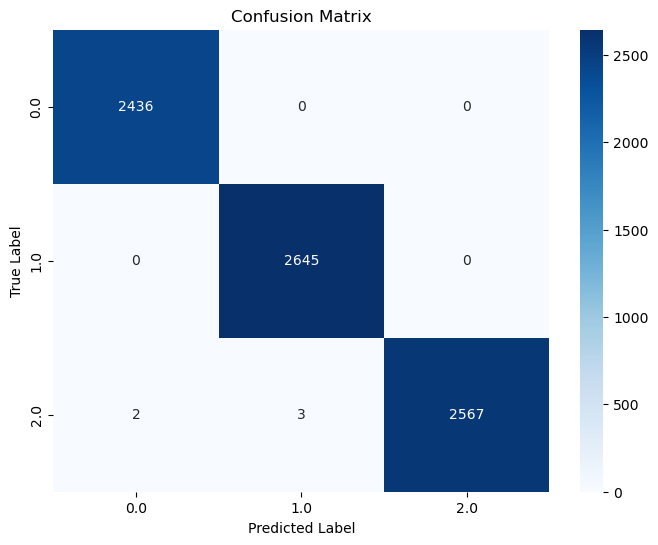

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Pradhyumna R Shetty\Downloads\all_combined.csv"
data = pd.read_csv(file_path)

# Remove rows with missing values in EC and O columns
data_cleaned = data.dropna(subset=['EC', 'O'])

# Use LabelEncoder to transform the target (O) if it's categorical
label_encoder = LabelEncoder()
O_encoded = label_encoder.fit_transform(data_cleaned['O'])

# Prepare the features (X) and target (y)
X = data_cleaned[['EC']]

# Apply standard scaling to the 'EC' feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, O_encoded, test_size=0.3, random_state=42)

# Create a RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use GridSearchCV to find the best hyperparameters with 9-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=9, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
best_rf_model = grid_search.best_estimator_
print("Prediction of O using EC : RFC")
print(f"Best parameters: {grid_search.best_params_}")

# Make predictions on the testing set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Fitting 9 folds for each of 20 candidates, totalling 180 fits
Prediction of O using EC : KNN
Best parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Accuracy: 0.9993466614399582
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2436
           1       1.00      1.00      1.00      2645
           2       1.00      1.00      1.00      2572

    accuracy                           1.00      7653
   macro avg       1.00      1.00      1.00      7653
weighted avg       1.00      1.00      1.00      7653



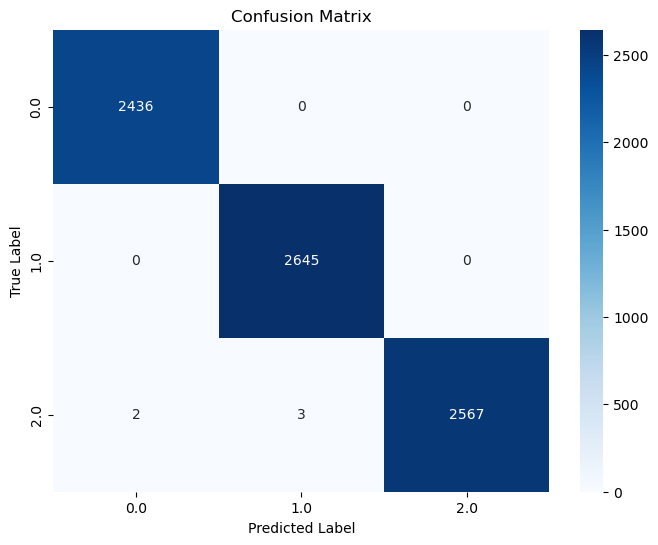

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Pradhyumna R Shetty\Downloads\all_combined.csv"
data = pd.read_csv(file_path)

# Remove rows with missing values in EC and O columns
data_cleaned = data.dropna(subset=['EC', 'O'])

# Use LabelEncoder to transform the target (O) if it's categorical
label_encoder = LabelEncoder()
O_encoded = label_encoder.fit_transform(data_cleaned['O'])

# Prepare the features (X) and target (y)
X = data_cleaned[['EC']]

# Apply standard scaling to the 'EC' feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, O_encoded, test_size=0.3, random_state=42)

# Create a KNeighborsClassifier model
knn_model = KNeighborsClassifier()

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for the Minkowski metric (1 for Manhattan, 2 for Euclidean)
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=9, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
best_knn_model = grid_search.best_estimator_
print("Prediction of O using EC : KNN")
print(f"Best parameters: {grid_search.best_params_}")

# Make predictions on the testing set
y_pred = best_knn_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Prediction of O using EC : Naive Bayes
Accuracy: 0.7185417483339867
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.13      0.22      2436
           1       0.72      0.99      0.83      2645
           2       0.70      1.00      0.83      2572

    accuracy                           0.72      7653
   macro avg       0.78      0.71      0.63      7653
weighted avg       0.78      0.72      0.64      7653



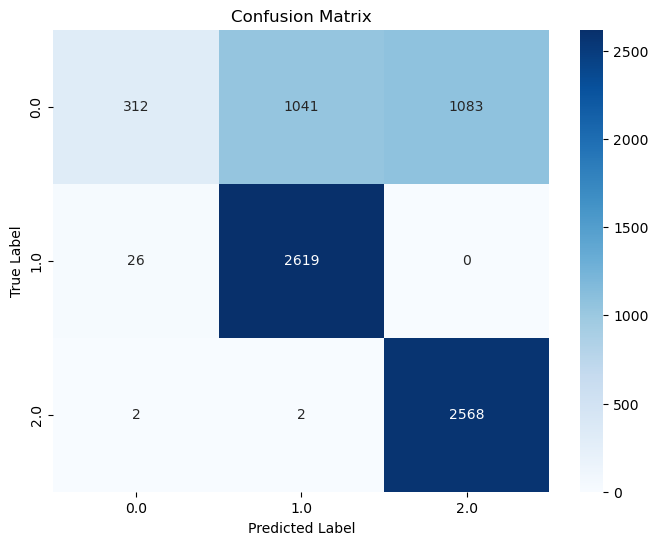

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Pradhyumna R Shetty\Downloads\all_combined.csv"
data = pd.read_csv(file_path)

# Remove rows with missing values in EC and O columns
data_cleaned = data.dropna(subset=['EC', 'O'])

# Use LabelEncoder to transform the target (O) if it's categorical
label_encoder = LabelEncoder()
O_encoded = label_encoder.fit_transform(data_cleaned['O'])

# Prepare the features (X) and target (y)
X = data_cleaned[['EC']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, O_encoded, test_size=0.3, random_state=42)

# Create a GaussianNB model (Naive Bayes)
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = nb_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Prediction of O using EC : Naive Bayes")
print(f"Accuracy: {accuracy}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Changing Train Test split to 6:4 and cross validation folds to 7

Fitting 7 folds for each of 216 candidates, totalling 1512 fits
Prediction of O using EC : RFC
Best parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9994119952959624
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3218
           1       1.00      1.00      1.00      3554
           2       1.00      1.00      1.00      3432

    accuracy                           1.00     10204
   macro avg       1.00      1.00      1.00     10204
weighted avg       1.00      1.00      1.00     10204



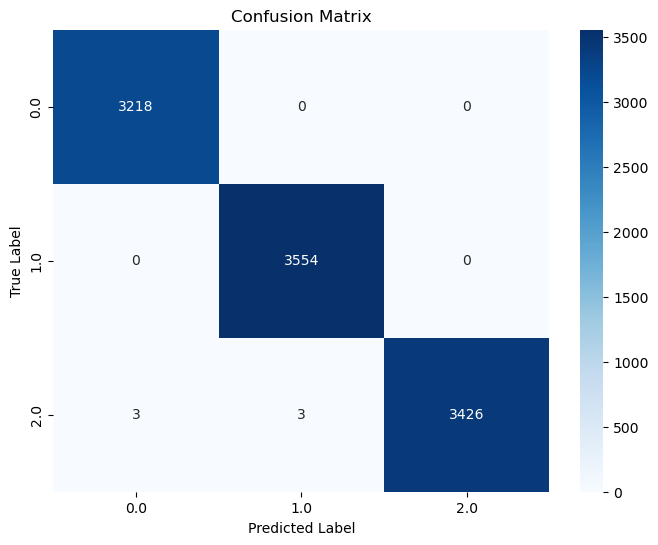

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Pradhyumna R Shetty\Downloads\all_combined.csv"
data = pd.read_csv(file_path)

# Remove rows with missing values in EC and O columns
data_cleaned = data.dropna(subset=['EC', 'O'])

# Use LabelEncoder to transform the target (O) if it's categorical
label_encoder = LabelEncoder()
O_encoded = label_encoder.fit_transform(data_cleaned['O'])

# Prepare the features (X) and target (y)
X = data_cleaned[['EC']]

# Apply standard scaling to the 'EC' feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, O_encoded, test_size=0.4, random_state=42)

# Create a RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use GridSearchCV to find the best hyperparameters with 9-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=7, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
best_rf_model = grid_search.best_estimator_
print("Prediction of O using EC : RFC")
print(f"Best parameters: {grid_search.best_params_}")

# Make predictions on the testing set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Fitting 7 folds for each of 20 candidates, totalling 140 fits
Prediction of O using EC : KNN
Best parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Accuracy: 0.9994119952959624
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3218
           1       1.00      1.00      1.00      3554
           2       1.00      1.00      1.00      3432

    accuracy                           1.00     10204
   macro avg       1.00      1.00      1.00     10204
weighted avg       1.00      1.00      1.00     10204



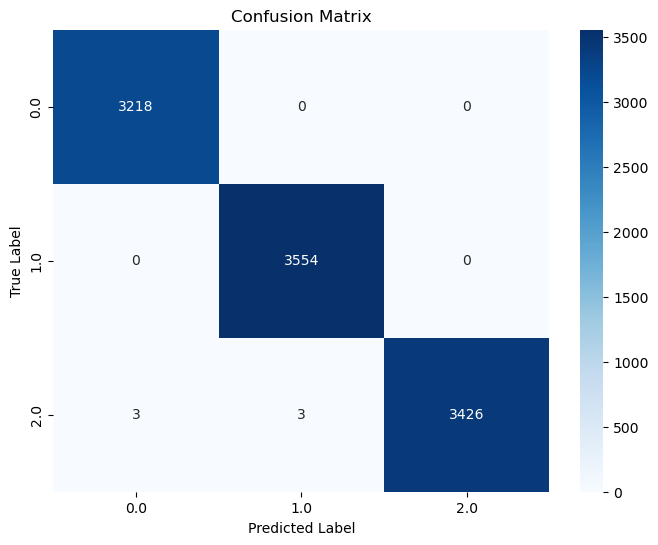

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Pradhyumna R Shetty\Downloads\all_combined.csv"
data = pd.read_csv(file_path)

# Remove rows with missing values in EC and O columns
data_cleaned = data.dropna(subset=['EC', 'O'])

# Use LabelEncoder to transform the target (O) if it's categorical
label_encoder = LabelEncoder()
O_encoded = label_encoder.fit_transform(data_cleaned['O'])

# Prepare the features (X) and target (y)
X = data_cleaned[['EC']]

# Apply standard scaling to the 'EC' feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, O_encoded, test_size=0.4, random_state=42)

# Create a KNeighborsClassifier model
knn_model = KNeighborsClassifier()

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for the Minkowski metric (1 for Manhattan, 2 for Euclidean)
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=7, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
best_knn_model = grid_search.best_estimator_
print("Prediction of O using EC : KNN")
print(f"Best parameters: {grid_search.best_params_}")

# Make predictions on the testing set
y_pred = best_knn_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Prediction of O using EC : Naive Bayes
Accuracy: 0.7380439043512348
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.18      0.30      3218
           1       0.77      0.99      0.87      3554
           2       0.68      1.00      0.81      3432

    accuracy                           0.74     10204
   macro avg       0.80      0.72      0.66     10204
weighted avg       0.80      0.74      0.67     10204



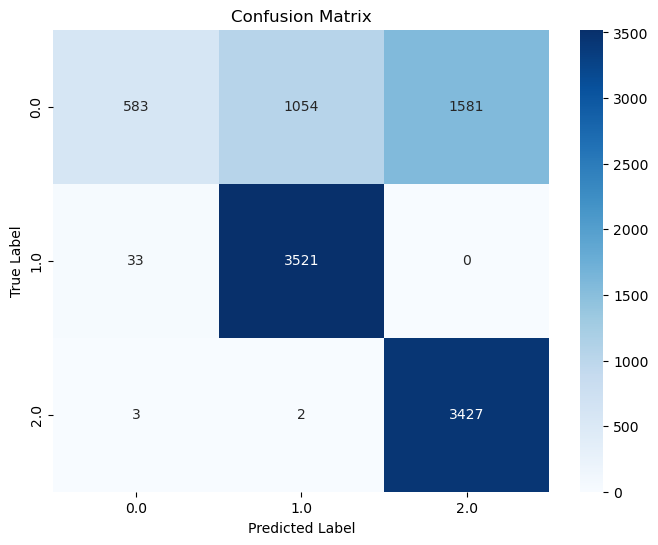

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Pradhyumna R Shetty\Downloads\all_combined.csv"
data = pd.read_csv(file_path)

# Remove rows with missing values in EC and O columns
data_cleaned = data.dropna(subset=['EC', 'O'])

# Use LabelEncoder to transform the target (O) if it's categorical
label_encoder = LabelEncoder()
O_encoded = label_encoder.fit_transform(data_cleaned['O'])

# Prepare the features (X) and target (y)
X = data_cleaned[['EC']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, O_encoded, test_size=0.4, random_state=42)

# Create a GaussianNB model (Naive Bayes)
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = nb_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Prediction of O using EC : Naive Bayes")
print(f"Accuracy: {accuracy}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
